# Chapter10.[기본] 소비 데이터 분석과 승객 생존율 예측

# Section 01. [판다스 활용] 카드 소비 데이터 분석
## 1. 원본 데이터 소개
실습에 사용할 데이터는 BC카드 소지자가 서울시 BC카드 가맹점에서 소비한 관련 텍스트 데이터
다. 이 데이터는 연월, 이용 지역, 업종 분류, 고객 거주 지역, 이용 건수 등 총 23개 열로 이루어져
있다.
이 데이터는 데이터진흥원의 데이터바우처사업 지원으로 구매한 데이터의 일부다. 이 책을 학습하는 용도(교육용)로만 사용해야 한다.  
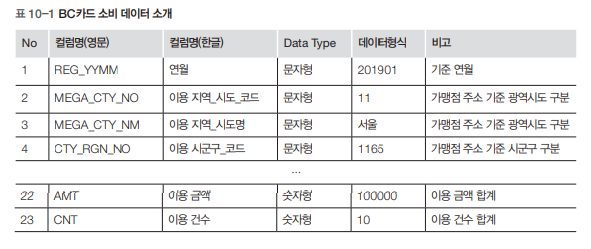

원본 데이터Raw Data의 파일명은 bc_card.txt이며 2019년 6월 전체 소비 데이터의 일부다. 용량은
13,179KB이며 100,002개 레코드로 이루어져 있다.  

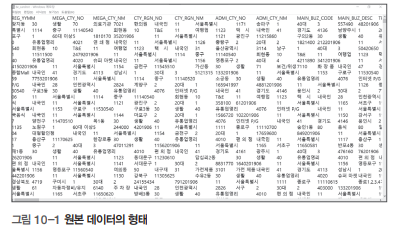

텍스트 파일인 원본 데이터를 엑셀로 불러오면 열 구분이 되지 않아 사용하기 쉽지 않다. 지금까지
배운 파이썬 문법을 활용해 사용하기 쉽게 가독성 있는 텍스트 데이터로 정제해보자. 다음은 이번
실습에서 답을 구하려는 질문이다.  
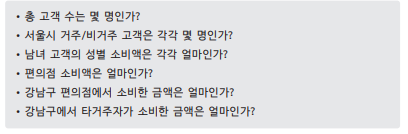  

데이터를 정제하여 이 질문에 대한 답을 구해보자.

## 2. 데이터 전처리
### 작업용 파일 생성하기
분석에 사용할 파일을 업로드하기 위해 구글 코랩에서 가상 드라이브를 만들어 마운트한다. 파일
을 업로드하기 위해 화면 왼쪽의 파일 아이콘을 누른다.

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

파일 창이 열리면 마우스 오른쪽 버튼 메뉴에서 [업로드]를 누른 뒤 분석할 텍스트 파일인 bc_
card.txt를 선택해 업로드한다.  
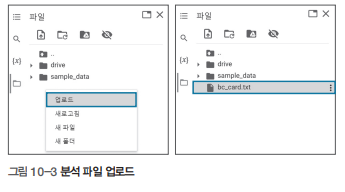

업로드한 bc_card.txt 파일을 불러와 byte 형태를 str 형태의 아스키 코드로 디코딩하여 작업용 파일인 bc_card_output.txt를 만들어보자.

In [2]:
import pandas as pd
#/content/drive/MyDrive/2023데이터청년캠퍼스/1_4주차_집체교육_파이썬강의_교재(한빛미디어천세학)/(10일차_2023_07_05)10장1절.BC카드데이터분석(판다스응용.상품학연구논문)10징2.3절타이타닉승객생존예측/bc_card.txt
#with open('/content/drive/MyDrive/2023데이터청년캠퍼스/1_4주차_집체교육_파이썬강의_교재(한빛미디어천세학)/(10일차_2023_07_05)10장1절.BC카드데이터분석(판다스응용.상품학연구논문)10징2.3절타이타닉승객생존예측/bc_card.txt', mode='rb') as f:

with open('bc_card.txt', mode='rb') as f:
  with open('bc_card_output.txt', mode='w') as w:
    data=f.read()
    print(type(data))
    data=data.decode('cp949')
    print(type(data))
    w.write(data)

<class 'bytes'>
<class 'str'>


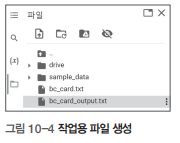

###데이터 정제하기
먼저, 생성된 bc_card_output.txt를 읽고 문자열 개수를 세어보자. 문자열이 총 10,235,713개라
는 것을 확인할 수 있다.

In [3]:
with open('bc_card_output.txt', mode='r') as f:
 data=f.read()
len(data)

10235713

In [4]:
with open('bc_card_output.txt', mode='r') as f:
 data=f.read()
len(data)

10235713

문자열을 100개만 출력해보자.

In [5]:
data[0:100]

'REG_YYMM\tMEGA_CTY_NO\tMEGA_CTY_NM\tCTY_RGN_NO\tCTY_RGN_NM\tADMI_CTY_NO\tADMI_CTY_NM\tMAIN_BUZ_CODE\tMAIN_BU'

In [6]:
data[0:100]

'REG_YYMM\tMEGA_CTY_NO\tMEGA_CTY_NM\tCTY_RGN_NO\tCTY_RGN_NM\tADMI_CTY_NO\tADMI_CTY_NM\tMAIN_BUZ_CODE\tMAIN_BU'

원본 데이터의 컬럼명이 \t로 구분된 것을 확인할 수 있다. \t를 기준으로 데이터를 나눠보자.

In [7]:
split_data=data.split('\t')
split_data[0:25]

['REG_YYMM',
 'MEGA_CTY_NO',
 'MEGA_CTY_NM',
 'CTY_RGN_NO',
 'CTY_RGN_NM',
 'ADMI_CTY_NO',
 'ADMI_CTY_NM',
 'MAIN_BUZ_CODE',
 'MAIN_BUZ_DESC',
 'TP_GRP_NO',
 'TP_GRP_NM',
 'TP_BUZ_NO',
 'TP_BUZ_NM',
 'CSTMR_GUBUN',
 'CSTMR_MEGA_CTY_NO',
 'CSTMR_MEGA_CTY_NM',
 'CSTMR_CTY_RGN_NO',
 'CSTMR_CTY_RGN_NM',
 'SEX_CTGO_CD',
 'AGE_VAL',
 'FLC',
 'AMT',
 'CNT201906',
 '11',
 '서울특별시']

In [8]:
split_data=data.split('\t')
split_data[0:25]

['REG_YYMM',
 'MEGA_CTY_NO',
 'MEGA_CTY_NM',
 'CTY_RGN_NO',
 'CTY_RGN_NM',
 'ADMI_CTY_NO',
 'ADMI_CTY_NM',
 'MAIN_BUZ_CODE',
 'MAIN_BUZ_DESC',
 'TP_GRP_NO',
 'TP_GRP_NM',
 'TP_BUZ_NO',
 'TP_BUZ_NM',
 'CSTMR_GUBUN',
 'CSTMR_MEGA_CTY_NO',
 'CSTMR_MEGA_CTY_NM',
 'CSTMR_CTY_RGN_NO',
 'CSTMR_CTY_RGN_NM',
 'SEX_CTGO_CD',
 'AGE_VAL',
 'FLC',
 'AMT',
 'CNT201906',
 '11',
 '서울특별시']

[표 2-1]을 보면, 원본 데이터가 총 23개 열로 이루어져 있고 23번째 컬럼명이 CNT이므로 split_
data[22]의 값이 CNT가 되어야 한다. 하지만 CNT201906이 출력되었다. 여기서 201906은 연도
와 월을 나타내는 REG_YYMM의 첫 번째 값이다. CNT와 201906이 나누어지지 않은 것인데 이
를 확인하기 위해 전체 원소 개수를 열로 나누어서 나머지가 0이 되는지 알아보자.

In [9]:
No_Column=23
len(split_data)%No_Column

3

나머지가 3이라는 것은 일부 레코드의 열 정보가 CNT201906처럼 잘못되어 있다는 의미다. 열 이
름 CNT와 데이터 201906 사이가 탭(\t)으로 구분되어 있지 않았기 때문에 나누는(split) 과정에
서 분리되지 않았다. 이를 해결하려면 CNT와 201906 사이에 탭(\t)을 넣어주고 다시 split을 실
행한다. 먼저 데이터형을 살펴보자. data는 str형, split_data는 list형임을 알 수 있다.

In [10]:
type(data), type(split_data)

(str, list)

변수 data에서 CNT가 몇 번째 문자인지 확인한다.

In [11]:
data.find('CNT')

257

CNT2019에 탭(\t)을 넣어 CNT\t2019 형태로 바꾸고자 한다. data[257:260]이 CNT이므로 이
다음에 탭(\t)을 넣는다. 즉, CNT의 맨 마지막 문자 T는 data[259]로, 인덱스 번호는 260번째다.   
2019로 새로 시작되는 레코드의 2는 data[260] 즉, 261번째다. 탭(\t)을 T와 2 사이인 261번째에
넣고 split 함수를 이용해 \t를 기준으로 나누어보자.

In [12]:
data=data[:260]+'\t'+data[260:]
split_data=data.split('\t')
split_data[22],split_data[23]

('CNT', '201906')

전체 원소 개수를 열로 다시 나누어보면 나머지가 여전히 0이 아닌 것을 확인할 수 있다.

In [13]:
len(split_data) % No_Column

4

이를 해결하려면 전체 데이터에 탭(\t)을 넣어야 한다는 것을 알 수 있다. 즉, 데이터의 레코드가
시작되는 곳을 확인한 뒤 탭(\t)을 넣어야 한다. 맨 마지막 열의 데이터와 다음 레코드가 시작되는
값 사이에 탭(\t)이 누락되었기 때문이다. 데이터의 레코드가 시작되는 지점은 201906이라는 것
을 알고 있으니 이 앞에 탭(\t)을 삽입한다.  
split_data[23]은 201906으로 레코드가 시작되는 값이다. 다음 201906은 22번째 이후에 시작된
다. split_data[23], split_data[23+22]을 확인해보면 ('201906', '1892201906')으로 22번째 이
후의 경우도 1892201906으로 연도 구분이 되어 있지 않다. 그래서 매번 22번째 이후에 탭(\t)을
넣어 분리할 것이다.

In [14]:
split_data[23],split_data[23+22]

('201906', '1892201906')

다음 코드를 이용해 탭(\t)을 넣을 기준 인덱스를 정한다.

In [15]:
split_data[23+22].find('201906')

4

실행 결과가 4라는 것은 5번째부터 201906이 시작된다는 의미다. 이전과 이후에 탭(\t)을 넣
는다.

In [16]:
Cycle= 22
i=1 # 첫 번째와 두 번째 고객 레코드 사이의 cnt와 연도를 구분하기 위해 탭(\t)을 넣으므로
while i < round((len(split_data)-Cycle)/Cycle):
    target_index=split_data[No_Column+Cycle*i].find('201906')
    split_data[No_Column+Cycle*i]=split_data[No_Column+Cycle*i][:target_index]+'\t'+split_data[No_Column+Cycle*i][target_index:]
    i+=1

---  
**TIP •** 가독성을 위해 코드 한 줄을 여러 줄로 나누고 싶을 때는 \ (혹은 \ )를 입력한 후 Enter 를 눌러서 나눠야 오류가 발생하지 않는다.   

---

전체 데이터에 탭(\t)이 잘 적용되었는지 확인해보자.

In [17]:
split_data[23],split_data[23+22]

('201906', '1892\t201906')

이제, 탭(\t)이 삽입된 부분을 나눠보자. 그러나 split_data 변수는 리스트 형태이므로 split 함수
를 적용할 수 없다. 따라서, join 함수를 이용해 모든 리스트 원소 사이에 탭(\t)을 넣는다. 앞에서
는 레코드가 시작되는 지점에 탭(\t)을 넣었고 이번에는 모든 원소 사이에 탭(\t)을 넣는다.  
예를 들어, join 함수를 이용해 원소 사이에 탭(\t)을 넣는 방법은 다음과 같다.

In [18]:
a=['a', 'b', 'c', 'd', '1', '2', '3']
print(a)
print()
result1="*****".join(a) # join 함수로 리스트를 문자열로 변환
print(result1)

['a', 'b', 'c', 'd', '1', '2', '3']

a*****b*****c*****d*****1*****2*****3


이제 join 함수를 통해 전체 원소 사이에 탭(\t)을 넣어서 확인해보자. join_split_data='\t'.
join(split_data)를 통해 join_split_data의 원소 앞에 탭(\t)이 있는 것을 확인할 수 있다.

In [19]:
join_split_data='\t'.join(split_data)
join_split_data[:24]

'REG_YYMM\tMEGA_CTY_NO\tMEG'

join 함수를 통한 데이터 join_split_data는 문자형이라는 것을 확인할 수 있다. 이제 \t를 기준으
로 나누어서 새로운 변수 joined_splited_data에 리스트 형태로 저장해보자.  

In [20]:
joined_splited_data=join_split_data.split('\t')
joined_splited_data[:23]

['REG_YYMM',
 'MEGA_CTY_NO',
 'MEGA_CTY_NM',
 'CTY_RGN_NO',
 'CTY_RGN_NM',
 'ADMI_CTY_NO',
 'ADMI_CTY_NM',
 'MAIN_BUZ_CODE',
 'MAIN_BUZ_DESC',
 'TP_GRP_NO',
 'TP_GRP_NM',
 'TP_BUZ_NO',
 'TP_BUZ_NM',
 'CSTMR_GUBUN',
 'CSTMR_MEGA_CTY_NO',
 'CSTMR_MEGA_CTY_NM',
 'CSTMR_CTY_RGN_NO',
 'CSTMR_CTY_RGN_NM',
 'SEX_CTGO_CD',
 'AGE_VAL',
 'FLC',
 'AMT',
 'CNT']

len(joined_splited_data) % No_Column을 실행하면 나머지가 0임을 알 수 있다(각자 실행해
보기 바란다). 다음과 같이 리스트 형태로 저장해보자.

In [21]:
total=[joined_splited_data[i: i+No_Column] for i in range(0,len(joined_splited_data),No_Column)]
total[1]

['201906',
 '11',
 '서울특별시',
 '1162',
 '관악구',
 '11620585',
 '낙성대동',
 '80',
 '음식',
 '80',
 '일반음식',
 '8006',
 '서양음식',
 '내국인',
 '11',
 '서울특별시',
 '1162',
 '관악구',
 '2',
 '30대',
 '2',
 '26284804',
 '1892']

### 데이터프레임 형식으로 저장하기  
리스트로 저장된 total 변수를 데이터프레임으로 저장해보자. 먼저 맨 마지막 레코드를 다시 출력
한다.

In [22]:
total=[joined_splited_data[i: i+No_Column] for i in range(0,len(joined_splited_data),No_Column)]
total[-1]

['201906',
 '11',
 '서울특별시',
 '1135',
 '노원구',
 '11350710',
 '상계9동',
 '20',
 '문화',
 '51',
 '학원',
 '5121',
 '초중고교육기관',
 '내국인',
 '41',
 '경기도',
 '4115',
 '의정부시',
 '1',
 '40대',
 '3',
 '5227500',
 '7']

총 레코드 수를 출력해보자.

In [23]:
len(total)

100002

total의 총 레코드는 100,002개로 첫 번째 레코드는 열 이름이다. 나머지 100,001개 레코드를 판
다스의 데이터프레임으로 저장해보자. 그리고 뒤에서는 이 데이터프레임을 csv로 저장할 것이다.  
먼저, 데이터프레임 형태로 바꾸면 total 변수의 첫 번째 원소 23개는 데이터프레임 헤더header가
되고 23개 원소를 갖는 total의 원소는 하나의 열row이 되어 총 100,001개의 고객 레코드로 구
성된다.

In [24]:
import pandas as pd
total_df=pd.DataFrame(total[1:], columns=total[0])
total_df

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,201906,11,서울특별시,1162,관악구,11620585,낙성대동,80,음식,80,...,내국인,11,서울특별시,1162,관악구,2,30대,2,26284804,1892
1,201906,11,서울특별시,1159,동작구,11590560,상도4동,30,생활,40,...,내국인,11,서울특별시,1165,서초구,2,20대,1,109290,18
2,201906,11,서울특별시,1162,관악구,11620595,청룡동,30,생활,83,...,내국인,11,서울특별시,1162,관악구,1,20대,1,268850,52
3,201906,11,서울특별시,1144,마포구,11440660,서교동,80,음식,80,...,내국인,11,서울특별시,1138,은평구,1,20대,1,44174450,1790
4,201906,11,서울특별시,1120,성동구,11200550,사근동,80,음식,80,...,내국인,11,서울특별시,1120,성동구,1,20대,1,60338146,3536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,201906,11,서울특별시,1165,서초구,11650520,서초2동,30,생활,40,...,내국인,43,충청북도,4311,청주시,1,50대,4,50600,10
99997,201906,11,서울특별시,1117,용산구,11170520,용산2가동,30,생활,40,...,내국인,11,서울특별시,1162,관악구,1,40대,2,38640,7
99998,201906,11,서울특별시,1156,영등포구,11560535,영등포동,30,생활,40,...,내국인,28,인천광역시,2817,미추홀구,2,30대,2,340590,15
99999,201906,11,서울특별시,1141,서대문구,11410585,신촌동,40,쇼핑,42,...,내국인,44,충청남도,4413,천안시,1,20대,2,117100,3


데이터프레임을 201906.csv 형태로 저장하고 다시 불러오자.

In [25]:
total_df.to_csv('201906.csv', encoding='utf-8')
bc_card=pd.read_csv('201906.csv',encoding='utf-8', index_col=0)
bc_card.head()
bc_card

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,201906,11,서울특별시,1162,관악구,11620585,낙성대동,80,음식,80,...,내국인,11,서울특별시,1162,관악구,2,30대,2,26284804,1892
1,201906,11,서울특별시,1159,동작구,11590560,상도4동,30,생활,40,...,내국인,11,서울특별시,1165,서초구,2,20대,1,109290,18
2,201906,11,서울특별시,1162,관악구,11620595,청룡동,30,생활,83,...,내국인,11,서울특별시,1162,관악구,1,20대,1,268850,52
3,201906,11,서울특별시,1144,마포구,11440660,서교동,80,음식,80,...,내국인,11,서울특별시,1138,은평구,1,20대,1,44174450,1790
4,201906,11,서울특별시,1120,성동구,11200550,사근동,80,음식,80,...,내국인,11,서울특별시,1120,성동구,1,20대,1,60338146,3536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,201906,11,서울특별시,1165,서초구,11650520,서초2동,30,생활,40,...,내국인,43,충청북도,4311,청주시,1,50대,4,50600,10
99997,201906,11,서울특별시,1117,용산구,11170520,용산2가동,30,생활,40,...,내국인,11,서울특별시,1162,관악구,1,40대,2,38640,7
99998,201906,11,서울특별시,1156,영등포구,11560535,영등포동,30,생활,40,...,내국인,28,인천광역시,2817,미추홀구,2,30대,2,340590,15
99999,201906,11,서울특별시,1141,서대문구,11410585,신촌동,40,쇼핑,42,...,내국인,44,충청남도,4413,천안시,1,20대,2,117100,3


---
**TIP •** 201906.csv 파일은 메모장에서는 한글 깨짐 없이 잘 보이는데 엑셀에서는 한글이 깨져 보일 수 있다. 이럴 때에는 메모장에서 201906.
csv 파일을 열고 ansi 형식으로 저장한 뒤 다시 엑셀에서 열면 한글이 깨지지 않고 잘 보인다.  

---

## 3. 데이터 분석  
앞에서 정제한 데이터에서 서울시 편의점 사용 거래를 추출하고 관련 정보를 분석해보기로 한다.

### 서울시 거주/비거주 고객의 소비 분석
BC카드 소비 데이터를 이용해 서울시 거주자와 비거주자의 소비액과 거래 건수를 살펴보자.   

#### ① 서울시 거주/비거주 고객 수 구하기
len 함수를 이용해 총 고객 수를 알 수 있다.

In [63]:
len(bc_card)

100001

이 중에서 서울시 거주 고객 수를 구해보자. 서울시 거주가 아닌 레코드의 인덱스를 index1로 설
정하고 이를 데이터프레임에서 제거하자. 서울시 거주 고객이 총 54,150명임을 알 수 있다.

In [64]:
index1=bc_card[bc_card['CSTMR_MEGA_CTY_NM'] !='서울특별시'].index
seoul_bc_card=bc_card.drop(index1)
seoul_bc_card.reset_index(drop=True, inplace=True)
len(seoul_bc_card)

54150

같은 방법으로 서울시 비거주 고객 수를 구해보자.

---
**TIP •** 총 인원에서 54,150명을 제외해 서울시 비거주 고객 수를 구할 수도 있다.

---

In [65]:
index2=bc_card[bc_card['CSTMR_MEGA_CTY_NM']=='서울특별시'].index
nonseoul_bc_card=bc_card.drop(index2)
nonseoul_bc_card.reset_index(drop=True, inplace=True)
len(nonseoul_bc_card)

45851

####② 총 소비액 구하기
서울시 거주/비거주 고객의 총 소비액을 구해보자. 서울 거주 고객의 데이터프레임은 seoul_bc_
card이다. 여기서 AMT 열의 값을 모두 합하면 총 소비액을 구할 수 있다.

In [66]:
print(seoul_bc_card['AMT'].sum(axis=0)) # 서울시 거주 고객의 소비액
print(nonseoul_bc_card['AMT'].sum(axis=0)) # 서울시 비거주 고객의 소비액

119663142676
146587135822


서울시 비거주 고객의 총 소비액은 nonseoul_bc_card['AMT'].sum(axis=0)으로 수정해서 구할
수 있다.

####③ 성별 소비액 구하기
남녀 고객의 성별 소비액을 구해보자. 판다스의 pivot_table 함수를 이용해 서울시 거주 고객의
남녀 성별 소비액을 다음과 같이 출력해본다. 이때 남녀 구분은 열 이름 SEX_CTGO_CD를 사용
하고, 피벗 테이블의 집계 값은 합 즉, aggfunc='sum'을 사용했다. 그리고 나머지 열은 삭제했다.
이때 남성은 1, 여성은 2를 나타낸다.

In [67]:
seoulsex=pd.pivot_table(seoul_bc_card, index=['SEX_CTGO_CD'], aggfunc='sum')
seoulsex=seoulsex.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC','MEGA_CTY_NO','TP_BUZ_NO'], axis=1)
seoulsex

,AMT
SEX_CTGO_CD,
1,58128378947
2,61534763729


이와 같이 남녀를 구분하여 성별 총 소비액을 비교하였다. 마찬가지로 서울시 비거주 고객의 남녀 소비액도 다음과 같이 출력할 수 있다.

In [68]:
nonseoulsex=pd.pivot_table(nonseoul_bc_card, index = ['SEX_CTGO_CD'], aggfunc = 'sum')
nonseoulsex=nonseoulsex.drop(['ADMI_CTY_NO','CTY_RGN_NO','TP_GRP_NO','MAIN_BUZ_CODE','REG_YYMM','CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC', 'MEGA_CTY_NO','TP_BUZ_NO'], axis=1)

nonseoulsex

,AMT
SEX_CTGO_CD,
1,73579570815
2,73007565007


####④ 카드 이용 건수 구하기
서울시 거주/비거주 고객의 카드 이용 건수를 구해보자. 이 값은 서울시 거주 고객의 정보를 저장
한 seoul_bc_card 데이터프레임의 'CNT' 열의 합계를 구하면 된다. 마찬가지로 서울시 비거주 고
객의 카드 이용 건수는 nonseoul_bc_card['CNT'].sum(axis=0)으로 구하면 된다.

In [69]:
print(seoul_bc_card['CNT'].sum(axis=0))
print(nonseoul_bc_card['CNT'].sum(axis=0))

5542462
4950200


###편의점 소비 정보 분석  
이번에는 고객들이 편의점에서 지출한 금액을 더해보고 강남구 거주 고객과 비강남구 거주 고객이
강남구 편의점에서 지출한 금액의 차이를 살펴보자.  
  
####① 편의점 소비액 구하기
먼저 고객들이 편의점에서 소비한 금액을 모두 구해보자. 전체 데이터프레임에서 열 이름 TP_
BUZ_NO가 4010인 값을 모두 더해서 구할 수 있다. 4010은 편의점을 의미한다.

In [70]:
import pandas as pd
bc_card_cov=bc_card[bc_card['TP_BUZ_NO']==4010] # 4010은 편의점
bc_card_cov['AMT'].sum(axis=0)

7299184098

다음으로 강남구 편의점에서 소비한 금액을 구해보자. 전체 레코드 중 열 이름 'CTY_RGN_NM'
이 '강남구'인 레코드만 찾아서 구하면 된다.

In [71]:
bc_card_gang_cov=bc_card[(bc_card['TP_BUZ_NO']==4010)&(bc_card['CTY_RGN_NM']=='강남구')]
bc_card_gang_cov['AMT'].sum(axis=0)

707275140

####② 강남구 편의점 소비액 분석하기
고객들이 강남구 편의점에서 소비한 금액 중 강남구 거주자와 비거주자의 차이를 구하자. bc_
card['CTY_RGN_NM']=='강남구'를 이용해 강남구에 위치한 편의점 매장의 전체 소비액을 구
하는 레코드를 저장하는 데이터프레임을 bc_card_gang으로 저장한다. 그리고 bc_card_
gang['AMT'].sum(axis=0)을 이용해 강남구 편의점 전체의 소비액을 구할 수 있다. 여기에 bc_
card['TP_BUZ_NO']==4010 조건을 추가하여 강남구에 위치한 편의점 레코드를 bc_card_
gang_cov의 데이터프레임에 저장한다. bc_card_gang_cov['AMT'].sum(axis=0)을 이용하면
총 소비액을 구할 수 있다.

In [72]:
import pandas as pd
bc_card_gang=bc_card[bc_card['CTY_RGN_NM']=='강남구']
print(bc_card_gang['AMT'].sum(axis=0)) # 강남구 전체
bc_card_gang_cov=bc_card[(bc_card['TP_BUZ_NO']==4010)&(bc_card['CTY_RGN_NM']=='강남구')]
bc_card_gang_cov['AMT'].sum(axis=0)
print(bc_card_gang_cov['AMT'].sum(axis=0)) # 강남구 편의점 전체

35535648502
707275140


강남구 거주 고객과 비거주 고객의 강남구 편의점 소비액을 구해보자. 먼저 강남구 거주 고객의 레
코드를 찾아 강남구 거주와 비거주로 레코드를 나누어서 이들의 편의점 매출액을 합한다. 즉 고
객 거주지(CSTMR_CTY_RGN_NM)가 강남구인 고객 레코드를 bc_card_gang_cov[bc_card_
gang_cov['CSTMR_CTY_RGN_NM']=='강남구'].index를 이용해 index3으로 저장하고, bc_
card_gang_cov.drop(index3)을 이용해 제외하면 강남구 비거주 고객의 레코드만 뽑아낸다. 그
리고 bc_card_gang1['AMT'].sum(axis=0)를 통해 강남구 비거주 고객의 편의점 소비액을 구한
다. 마찬가지로 강남구 거주 고객의 편의점 소비액도 구할 수 있다.

In [73]:
bc_card_gang=bc_card_gang_cov
index3 = bc_card_gang_cov[bc_card_gang_cov['CSTMR_CTY_RGN_NM']=='강남구'].index
bc_card_gang1 = bc_card_gang_cov.drop(index3)
bc_card_gang1.reset_index(drop=True, inplace=True)
bc_card_gang1['AMT'].sum(axis=0)
index4 = bc_card_gang_cov[bc_card_gang_cov['CSTMR_CTY_RGN_NM']!='강남구'].index
bc_card_gang2 = bc_card_gang_cov.drop(index4)
bc_card_gang2.reset_index(drop=True, inplace=True)
bc_card_gang2['AMT'].sum(axis=0)
print(bc_card_gang1['AMT'].sum(axis=0)) # 강남구 거주 고객의 강남구 소비액
print(bc_card_gang2['AMT'].sum(axis=0)) # 강남구 비거주 고객의 강남구 소비액

418895250
288379890


##4. 데이터 분석 응용
지금까지 배운 내용을 응용해보자. 이번에는 레코드가 100만 개를 넘는 2020년 3월의 카드 소비
데이터인 bc_card_out2020_03.txt를 이용해 자치구 내의 편의점 소비액 차이를 구해본다. 먼저
bc_card_out2020_03.txt를 코랩 환경에서 실습할 수 있도록 업로드한다. 각자 작업 환경에 따라
다르지만 데이터 용량이 커서 업로드에 상당한 시간이 필요할 수 있다.

In [74]:
import pandas as pd
df=pd.read_csv('bc_card_out2020_03.txt', sep="\t", encoding='utf-8')
df1=pd.DataFrame(df)
df1.head()

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,202003,11,서울특별시,1168,강남구,11680750,수서동,30,생활,40,...,내국인,11,서울특별시,1168,강남구,2,20대,1,7927440,1089
1,202003,11,서울특별시,1129,성북구,11290660,길음1동,30,생활,70,...,내국인,11,서울특별시,1129,성북구,1,40대,4,274100,25
2,202003,11,서울특별시,1144,마포구,11440555,아현동,30,생활,40,...,내국인,11,서울특별시,1114,중구,1,60대 이상,5,34395725,808
3,202003,11,서울특별시,1126,중랑구,11260590,상봉2동,30,생활,40,...,내국인,11,서울특별시,1126,중랑구,2,20대,1,31860800,3699
4,202003,11,서울특별시,1168,강남구,11680630,대치4동,30,생활,62,...,내국인,41,경기도,4146,용인시,2,50대,4,2546487,45


###서울시 거주/비거주 고객의 소비액 구하기
2020년 3월 데이터에서 서울시 거주 고객의 소비액과 비거주 고객의 소비액을 구해보자. 서
울시 비거주 고객의 레코드를 ind2로 인덱스하여 이를 전체 레코드에서 삭제하면 나머지가 서
울 거주 고객의 레코드다. seoul['AMT'].sum(axis=0)을 통해 서울시 거주 고객의 소비액,
nonseoul['AMT'].sum(axis=0)을 통해 서울시 비거주 고객의 소비액을 구할 수 있다.

In [75]:
import pandas as pd
df=pd.read_csv('bc_card_out2020_03.txt', sep='\t', encoding='utf-8')
df1=pd.DataFrame(df)
df1=df1.drop(['CTY_RGN_NO','ADMI_CTY_NO','ADMI_CTY_NM','TP_GRP_NO',\
 'TP_GRP_NM','CSTMR_GUBUN',\
 ], axis=1)
ind2=df1[df1['CSTMR_MEGA_CTY_NM']!='서울특별시'].index # 서울시 비거주 고객 인덱스화
seoul=df1.drop(ind2)
seoul.reset_index(drop=True, inplace=True)
ind3=df1[df1['CSTMR_MEGA_CTY_NM']=='서울특별시'].index # 서울시 거주 고객만 추출
nonseoul=df1.drop(ind3)
nonseoul.reset_index(drop=True, inplace=True)
print(seoul['AMT'].sum(axis=0)) # 서울시 거주 고객 소비액
print(nonseoul['AMT'].sum(axis=0)) # 서울시 비거주 고객 소비액

1385914569631
1940899349900


서울시 거주/비거주 고객의 수는 len(seoul), len(nonseoul)로 구할 수도 있다. 각각의 카드 이용
건수는 seoul['CNT'].sum(axis=0), nonseoul['CNT'].sum(axis=0)으로 구할 수 있다.  
### 남녀 지출액 구하기
2020년 3월 데이터에서 서울시 거주/비거주 고객의 남녀 소비액은 다음과 같이 구할 수 있다.
pivot_table 피벗 테이블 함수를 이용해 남녀의 성별 소비액을 더해서 출력한다.

In [76]:
seoulsex=pd.pivot_table(seoul, index=['SEX_CTGO_CD'], aggfunc = 'sum') # 1 남성 2 여성
seoulsex=seoulsex.drop(['CNT','CSTMR_CTY_RGN_NO','CSTMR_MEGA_CTY_NO','FLC','MAIN_BUZ_CODE','MEGA_CTY_NO','REG_YYMM','TP_BUZ_NO'], axis=1)
seoulsex

,AMT
SEX_CTGO_CD,
1,682678945342
2,703235624289


###거주지 소재 편의점 소비액 구하기
2020년 3월 데이터에서 서울시 거주 고객이 자신이 거주하는 구에 위치한 편의점에서 소비한 금
액과 지출액과 타 자치구민이 해당구의 편의점에서 지출한 금액의 차이를 구해보자. 이는 어떤 자
치구에 외부의 인구가 많이 유입되었는지 알 수 있는 정보로 활용하고자 분석하는 것이다. 먼저 다
음과 같이 서울시 전체 편의점을 대상으로 한 레코드를 추출하고 총 매출액을 구해보자.

In [77]:
import pandas as pd
seoul_cov = seoul[seoul['TP_BUZ_NO']==4010] # 편의점
seoul_cov['CNT'].sum(axis=0)
seoul_cov['AMT'].sum(axis=0)

66513977146

seoul[seoul['CTY_RGN_NM'] !=seoul['CSTMR_CTY_RGN_NM']]을 이용해 편의점 소재지를
나타내는 열인 CTY_RGN_NM과 고객 거주지를 나타내는 열인 CSTMR_CTY_RGN_NM이 일
치하지 않은 레코드를 제외하면 거주지 소재 편의점에서 소비한 고객을 추출할 수 있다.

In [78]:
import pandas as pd
seoul=seoul_cov
index1 = seoul[seoul['CTY_RGN_NM'] != seoul['CSTMR_CTY_RGN_NM']].index
resid = seoul.drop(index1)
resid.reset_index(drop=True, inplace=True)
index2 = seoul[seoul['CTY_RGN_NM'] == seoul['CSTMR_CTY_RGN_NM']].index
nonresid = seoul.drop(index2)
nonresid.reset_index(drop=True, inplace=True)
print(resid['AMT'].sum(axis=0)) # 거주지 내 소비액
print(nonresid['AMT'].sum(axis=0)) # 거주지 외 소비액


44184614834
22329362312


# 참고: 다른 방식으로 데이터 불러오기 1

In [79]:
#from google.colab import drive
#drive.mount('/content/drive')

In [80]:
import pandas as pd
with open('bc_card.txt', mode='rb') as f:
#with open('/content/drive/MyDrive/2023데이터청년캠퍼스/1_4주차_집체교육_파이썬강의_교재(한빛미디어천세학)/(10일차_2023_07_05)10장1절.BC카드데이터분석(판다스응용.상품학연구논문)10징2.3절타이타닉승객생존예측/bc_card.txt', mode='rb') as f:
	with open('bc_card_output.txt', mode='w') as w:
		data = f.read()
		print(type(data))
		data = data.decode('cp949')
		print(type(data))
		w.write(data)

<class 'bytes'>
<class 'str'>


In [81]:
with open('bc_card_output.txt', mode='r') as f:
	data = f.read()
len(data)

10235713

In [82]:
split_data = data[0:260].split('\t')
split_data

['REG_YYMM',
 'MEGA_CTY_NO',
 'MEGA_CTY_NM',
 'CTY_RGN_NO',
 'CTY_RGN_NM',
 'ADMI_CTY_NO',
 'ADMI_CTY_NM',
 'MAIN_BUZ_CODE',
 'MAIN_BUZ_DESC',
 'TP_GRP_NO',
 'TP_GRP_NM',
 'TP_BUZ_NO',
 'TP_BUZ_NM',
 'CSTMR_GUBUN',
 'CSTMR_MEGA_CTY_NO',
 'CSTMR_MEGA_CTY_NM',
 'CSTMR_CTY_RGN_NO',
 'CSTMR_CTY_RGN_NM',
 'SEX_CTGO_CD',
 'AGE_VAL',
 'FLC',
 'AMT',
 'CNT']

In [83]:
import csv

target = '201906'
index = -1
old_index = 0

with open('test.csv', 'w', encoding='cp949', newline='') as f:
    write = csv.writer(f)
    while True:
        index = data.find(target,index+1)
        if index == -1:
            #myData = data[old_index:index].split('\t')
            #write.writerow(myData)
            break
        myData = data[old_index:index].split('\t')
        write.writerow(myData)
        old_index = index+1

In [84]:
'''
a='11201909'
t='201906'
a.find(t)
'''

"\na='11201909'\nt='201906'\na.find(t)\n"

In [85]:
import pandas as pd

df=pd.read_csv('test.csv', encoding='cp949')
df=pd.DataFrame(df)
df.head()

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,1906,11,서울특별시,1162,관악구,11620585,낙성대동,80,음식,80,...,내국인,11,서울특별시,1162,관악구,2,30대,2,26284804,1892
1,1906,11,서울특별시,1159,동작구,11590560,상도4동,30,생활,40,...,내국인,11,서울특별시,1165,서초구,2,20대,1,109290,18
2,1906,11,서울특별시,1162,관악구,11620595,청룡동,30,생활,83,...,내국인,11,서울특별시,1162,관악구,1,20대,1,268850,52
3,1906,11,서울특별시,1144,마포구,11440660,서교동,80,음식,80,...,내국인,11,서울특별시,1138,은평구,1,20대,1,44174450,1790
4,1906,11,서울특별시,1120,성동구,11200550,사근동,80,음식,80,...,내국인,11,서울특별시,1120,성동구,1,20대,1,60338146,3536


In [86]:
len(df)

100000

In [87]:
df.tail()
# 맨 끝 레코드는 왜 삭제되었는지 알아볼 것

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
99995,1906,11,서울특별시,1114,중구,11140520,소공동,30,생활,40,...,내국인,45,전라북도,4511,전주시,1,40대,3,971830,13
99996,1906,11,서울특별시,1165,서초구,11650520,서초2동,30,생활,40,...,내국인,43,충청북도,4311,청주시,1,50대,4,50600,10
99997,1906,11,서울특별시,1117,용산구,11170520,용산2가동,30,생활,40,...,내국인,11,서울특별시,1162,관악구,1,40대,2,38640,7
99998,1906,11,서울특별시,1156,영등포구,11560535,영등포동,30,생활,40,...,내국인,28,인천광역시,2817,미추홀구,2,30대,2,340590,15
99999,1906,11,서울특별시,1141,서대문구,11410585,신촌동,40,쇼핑,42,...,내국인,44,충청남도,4413,천안시,1,20대,2,117100,3
